# Deliverable 1

Importing Dependecies

In [ ]:
import numpy as np
import pandas as pd

Importing the dataset

In [ ]:
df=pd.read_csv('neo_v2.csv')

Taking inputs from user

In [ ]:
def findStandardisedValues(df):
  l1=[]
  # relative_velocity
  min_X = df["relative_velocity"].min()
  max_X = df["relative_velocity"].max()
  x_new = input("Enter Value for Relative Velocity")
  x_new_normalized = (x_new - min_X) / (max_X - min_X)
  l1.push(x_new_normalized)

  #miss_distance
  min_X = df["miss_distance"].min()
  max_X = df["miss_distance"].max()
  x_new = input("Enter Value for Miss Distance")
  x_new_normalized = (x_new - min_X) / (max_X - min_X)
  l1.push(x_new_normalized)

  #absolute_magnitude
  min_X = df["absolute_magnitude"].min()
  max_X = df["absolute_magnitude"].max()
  x_new = input("Enter Value for Absolute Magnitude")
  x_new_normalized = (x_new - min_X) / (max_X - min_X)
  l1.push(x_new_normalized)


  #	est_diameter_max
  min_X = df["est_diameter_max"].min()
  max_X = df["est_diameter_max"].max()
  x_new = input("Enter Value forEstimated Diameter")
  x_new_normalized = (x_new - min_X) / (max_X - min_X)
  l1.push(x_new_normalized)

  return l1

In [ ]:
df.shape

(90836, 10)

In [ ]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


Checking for null values

In [ ]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

Validating Datatypes

In [ ]:
df.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

In [ ]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


Dropping Columns

In [ ]:
df.orbiting_body.unique()

array(['Earth'], dtype=object)

In [ ]:
colunms_to_drop=['orbiting_body','id','sentry_object']
df.drop(columns=colunms_to_drop,inplace=True)

In [ ]:
df.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


Creating a new column to calculate the errors in 'est_diameter'

In [ ]:
df['est_diameter_error']=(df['est_diameter_max']-df['est_diameter_min'])/2
df.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,est_diameter_error
0,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False,0.740572
1,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True,0.164273
2,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False,0.446239
3,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False,0.059644
4,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True,0.157604


Binary Encoding of 'hazardous' column

In [ ]:
df['hazardous']=df['hazardous'].astype("category").cat.codes

In [ ]:
df.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,est_diameter_error
0,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,0,0.740572
1,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,1,0.164273
2,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,0,0.446239
3,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,0,0.059644
4,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,1,0.157604


In [ ]:
df.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,est_diameter_error
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000,90836.000000,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103,0.097318,0.078757
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086,0.296392,0.184490
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000,0.000000,0.000376
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000,0.000000,0.011901
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000,0.000000,0.029893
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000,0.000000,0.088627
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000,1.000000,23.418946


Scaling Columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
columns_to_scale=['relative_velocity','miss_distance','absolute_magnitude','est_diameter_min','est_diameter_max','est_diameter_error']
df[columns_to_scale]=scaler.fit_transform(df[columns_to_scale])

In [ ]:
df.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,est_diameter_error
count,9.083600e+04,9.083600e+04,9.083600e+04,9.083600e+04,9.083600e+04,90836.000000,9.083600e+04
mean,-6.070073e-17,9.026887e-17,-1.742017e-16,-1.239046e-16,4.552555e-16,0.097318,-1.016894e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,0.296392,1.000006e+00
min,-4.248547e-01,-4.248547e-01,-1.892353e+00,-1.658014e+00,-4.940138e+00,0.000000,-4.248547e-01
25%,-3.623890e-01,-3.623890e-01,-7.688996e-01,-8.883231e-01,-7.557190e-01,0.000000,-3.623890e-01
50%,-2.648640e-01,-2.648640e-01,-1.532747e-01,3.489782e-02,5.974166e-02,0.000000,-2.648640e-01
75%,5.349850e-02,5.349850e-02,5.873796e-01,8.716232e-01,7.508101e-01,0.000000,5.349850e-02
max,1.265126e+02,1.265126e+02,7.469341e+00,1.688093e+00,3.342317e+00,1.000000,1.265126e+02


Principal Component Analysis

In [ ]:
df2=df.copy()
df2.drop(columns=['name'],inplace=True)
df2.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,est_diameter_error
0,3.587284,3.587284,-1.363913,0.795153,-2.348632,0,3.587284
1,0.463529,0.463529,1.009040,1.090357,-1.218735,1,0.463529
2,1.991887,1.991887,2.616983,0.569624,-1.968544,0,1.991887
3,-0.103601,-0.103601,-0.921301,-0.520384,-0.458560,0,-0.103601
4,0.427378,0.427378,-0.210697,0.412001,-1.187637,1,0.427378


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
df3= pca.fit_transform(df2)
df4 = pd.DataFrame(df3 , columns= ['PC1','PC2','PC3'])

In [ ]:
df4

,PC1,PC2,PC3
0,0.143398,-0.213701,0.124930
1,0.863812,0.454322,-0.035872
2,0.146692,-0.183983,0.333868
3,-0.178893,0.037477,0.032489
4,0.697724,0.593852,-0.077204
...,...,...,...
90831,-0.311956,0.146109,0.032565
90832,0.082650,-0.230882,-0.108223
90833,-0.180086,0.008697,-0.094084
90834,0.221086,-0.365859,-0.146019


Exporting the cleaned dataset

In [ ]:
df.to_csv('cleaned_neo_v2.csv',index=False)

# **Deliverable 2**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df=pd.read_csv('cleaned_neo_v2.csv')

In [ ]:
df.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,est_diameter_error
0,162635 (2000 SS164),0.031607,0.031607,0.056447,0.733141,0.312891,0,0.031607
1,277475 (2005 WK4),0.006999,0.006999,0.309922,0.821364,0.449312,1,0.006999
2,512244 (2015 YE18),0.019039,0.019039,0.481680,0.665740,0.358782,0,0.019039
3,(2012 BV13),0.002531,0.002531,0.103726,0.339986,0.541093,0,0.002531
4,(2014 GE35),0.006714,0.006714,0.179632,0.618634,0.453066,1,0.006714


In [ ]:
df.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,est_diameter_error
count,90836.000000,90836.000000,90836.000000,90836.000000,90836.000000,90836.000000,90836.000000
mean,0.003347,0.003347,0.202138,0.495505,0.596458,0.097318,0.003347
std,0.007878,0.007878,0.106819,0.298856,0.120738,0.296392,0.007878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000492,0.000492,0.120005,0.230026,0.505215,0.000000,0.000492
50%,0.001260,0.001260,0.185765,0.505935,0.603671,0.000000,0.001260
75%,0.003768,0.003768,0.264881,0.755994,0.687109,0.000000,0.003768
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Top 25 hazardous fastest objects

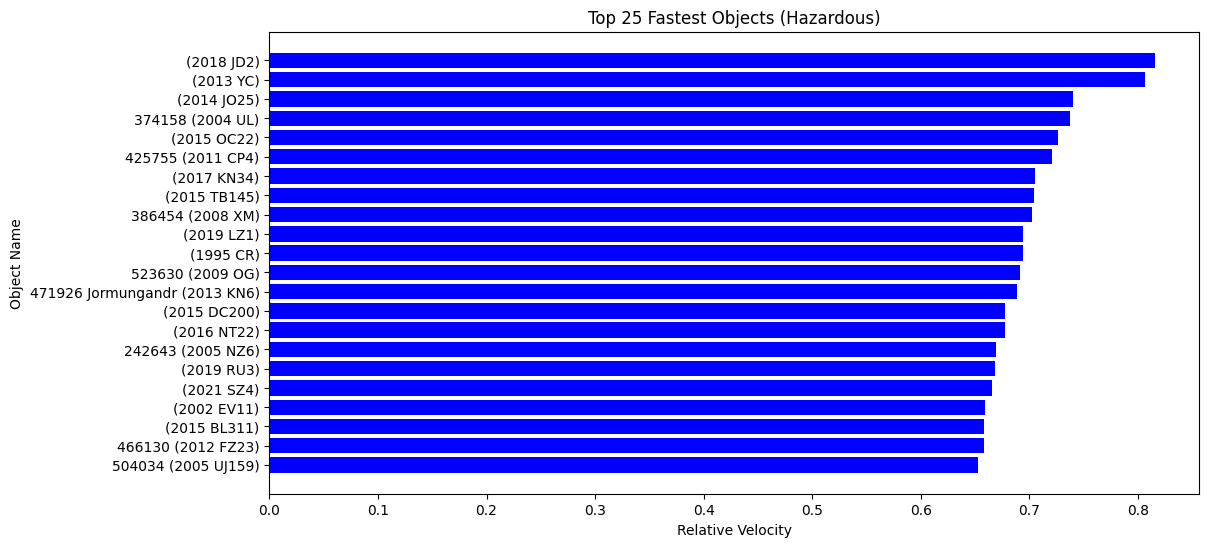

In [ ]:
hazardous_df = df[df['hazardous'] == 1]

# Sort the hazardous objects by relative velocity in descending order
sorted_df = hazardous_df.sort_values('relative_velocity', ascending=False)

# Select the top 25 objects with the highest relative velocity
top_25_df = sorted_df.head(25)

plt.figure(figsize=(12, 6))
plt.barh(top_25_df['name'], top_25_df['relative_velocity'], color='blue')


plt.xlabel('Relative Velocity')
plt.ylabel('Object Name')
plt.title('Top 25 Fastest Objects (Hazardous)')
plt.gca().invert_yaxis()


plt.show()

Top 25 Hazardous Estd diameter maximum

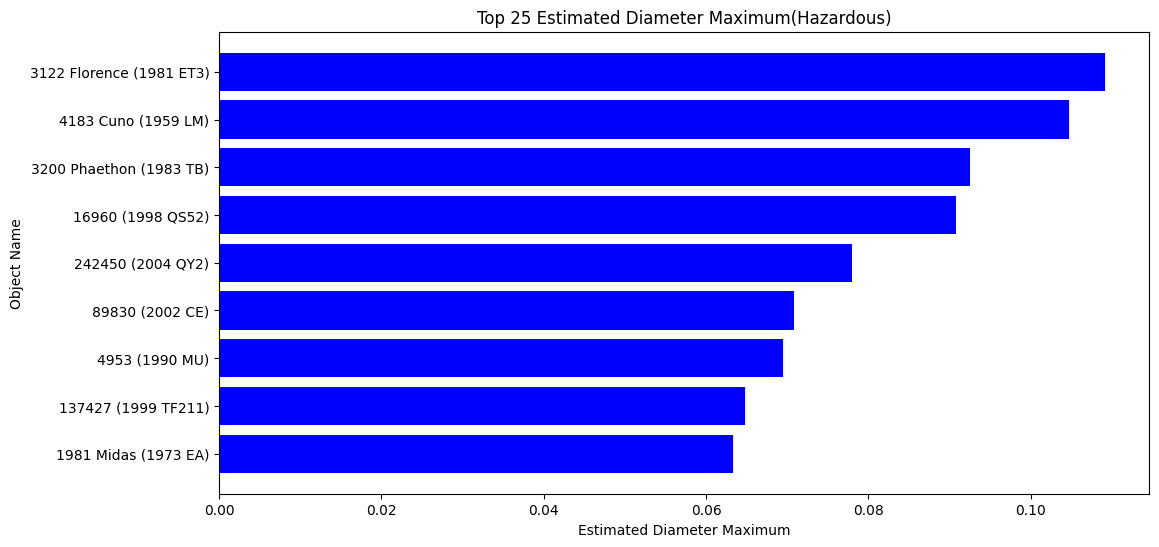

In [ ]:
hazardous_df = df[df['hazardous'] == 1]

# Sort the hazardous objects by relative velocity in descending order
sorted_df = hazardous_df.sort_values('est_diameter_max', ascending=False)
top_25_df = sorted_df.head(25)
plt.figure(figsize=(12, 6))
plt.barh(top_25_df['name'], top_25_df['est_diameter_max'], color='blue')

plt.xlabel('Estimated Diameter Maximum')
plt.ylabel('Object Name')
plt.title('Top 25 Estimated Diameter Maximum(Hazardous)')
plt.gca().invert_yaxis()
plt.show()

Bubble Plot of Absolute magnitude vs Relative velocity with hazardous and miss distance


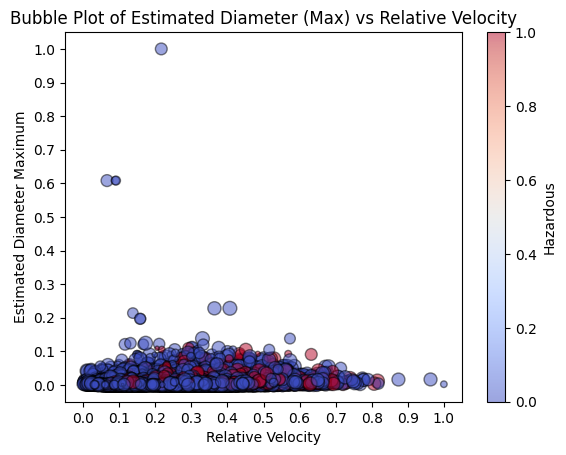

In [ ]:
# Bubble plot of absolute magnitude vs relative velocity with hazardous and miss distance
plt.scatter(df['relative_velocity'], df['est_diameter_max'], c=df['hazardous'], s=(df['miss_distance']*100), cmap='coolwarm',alpha=0.5,edgecolors='k')
plt.xlabel('Relative Velocity')
plt.ylabel('Estimated Diameter Maximum')
plt.colorbar(label='Hazardous')
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.title('Bubble Plot of Estimated Diameter (Max) vs Relative Velocity')
plt.show()

Histograms

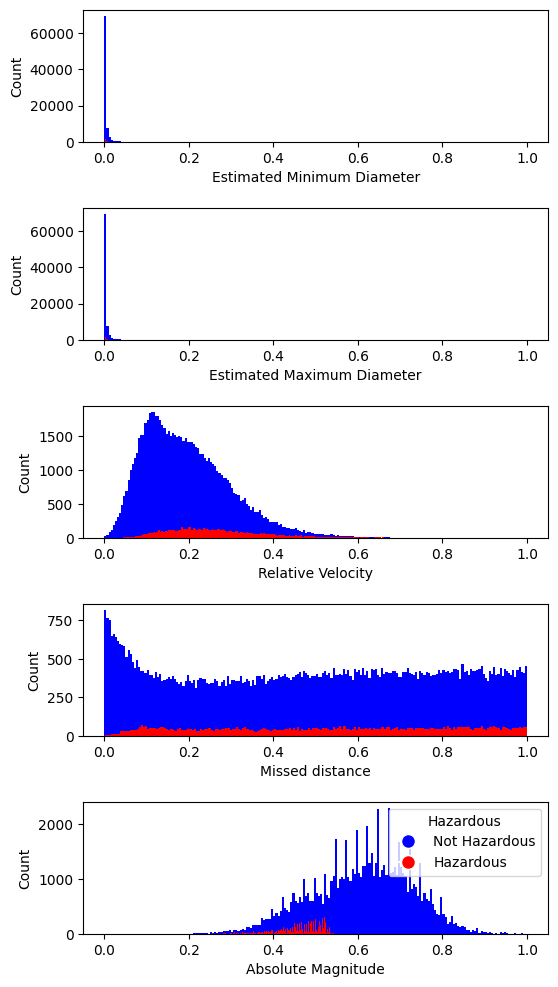

In [ ]:
#all histograms red shows hazardous while blue shows non-hazardous
fig, axs = plt.subplots(5, 1, figsize=(6, 12), sharex=False)
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing

hazardous = df[df.hazardous == 1]
non_hazardous = df[df.hazardous == 0]

axs[0].hist(non_hazardous["est_diameter_min"], bins=200, color='blue', alpha = 1)
axs[0].hist(hazardous["est_diameter_min"], bins=200, color='red', alpha = 1)

axs[0].set_xlabel("Estimated Minimum Diameter")
axs[0].set_ylabel("Count")


axs[1].hist(non_hazardous["est_diameter_max"], bins=200, color='blue', alpha = 1)
axs[1].hist(hazardous["est_diameter_max"], bins=200, color='red', alpha = 1)

axs[1].set_xlabel("Estimated Maximum Diameter")
axs[1].set_ylabel("Count")

axs[2].hist(non_hazardous["relative_velocity"], bins=200, color='blue', alpha = 1)
axs[2].hist(hazardous["relative_velocity"], bins=200, color='red', alpha = 1)

axs[2].set_xlabel("Relative Velocity")
axs[2].set_ylabel("Count")

axs[3].hist(non_hazardous["miss_distance"], bins=200, color='blue', alpha = 1)
axs[3].hist(hazardous["miss_distance"], bins=200, color='red', alpha = 1)

axs[3].set_xlabel("Missed distance")
axs[3].set_ylabel("Count")

axs[4].hist(non_hazardous["absolute_magnitude"], bins=200, color='blue', alpha = 1)
axs[4].hist(hazardous["absolute_magnitude"], bins=200, color='red', alpha = 1)

axs[4].set_xlabel("Absolute Magnitude")
axs[4].set_ylabel("Count")

legend_labels = ['Not Hazardous', 'Hazardous']
legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for color, label in zip(['blue', 'red'], legend_labels)]
plt.legend(handles=legend, title='Hazardous', loc='upper right')
plt.show()


plt.show()

Boxplot of Every Variable

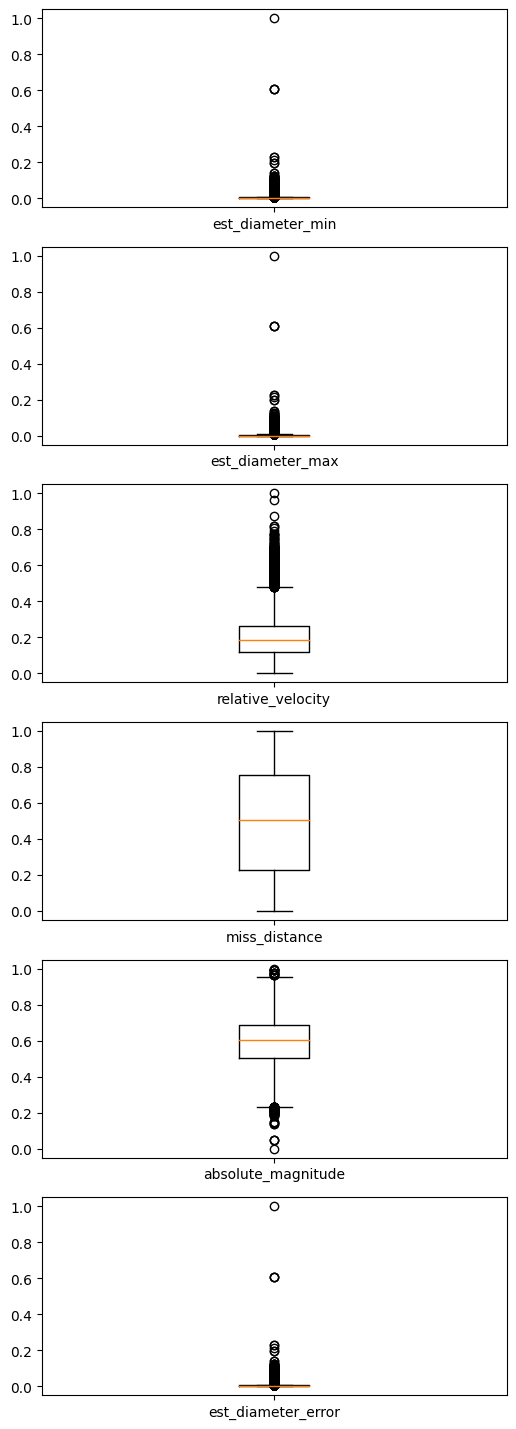

In [ ]:
#all boxplots
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(6, 18))  # Increase the figure height
gs = gridspec.GridSpec(6, 1, height_ratios=[1, 1, 1, 1, 1, 1])  # Adjust height ratios

axs = [plt.subplot(gs[i]) for i in range(6)]


axs[0].boxplot(df['est_diameter_min'])
axs[0].set_xticklabels(["est_diameter_min"])


axs[1].boxplot(df['est_diameter_max'])
axs[1].set_xticklabels(["est_diameter_max"])


axs[2].boxplot(df['relative_velocity'])
axs[2].set_xticklabels(["relative_velocity"])


axs[3].boxplot(df['miss_distance'])
axs[3].set_xticklabels(["miss_distance"])


axs[4].boxplot(df['absolute_magnitude'])
axs[4].set_xticklabels(["absolute_magnitude"])


axs[5].boxplot(df['est_diameter_error'])
axs[5].set_xticklabels(["est_diameter_error"])

plt.show()

Scatter Matrix Based with Hazardous Attribute

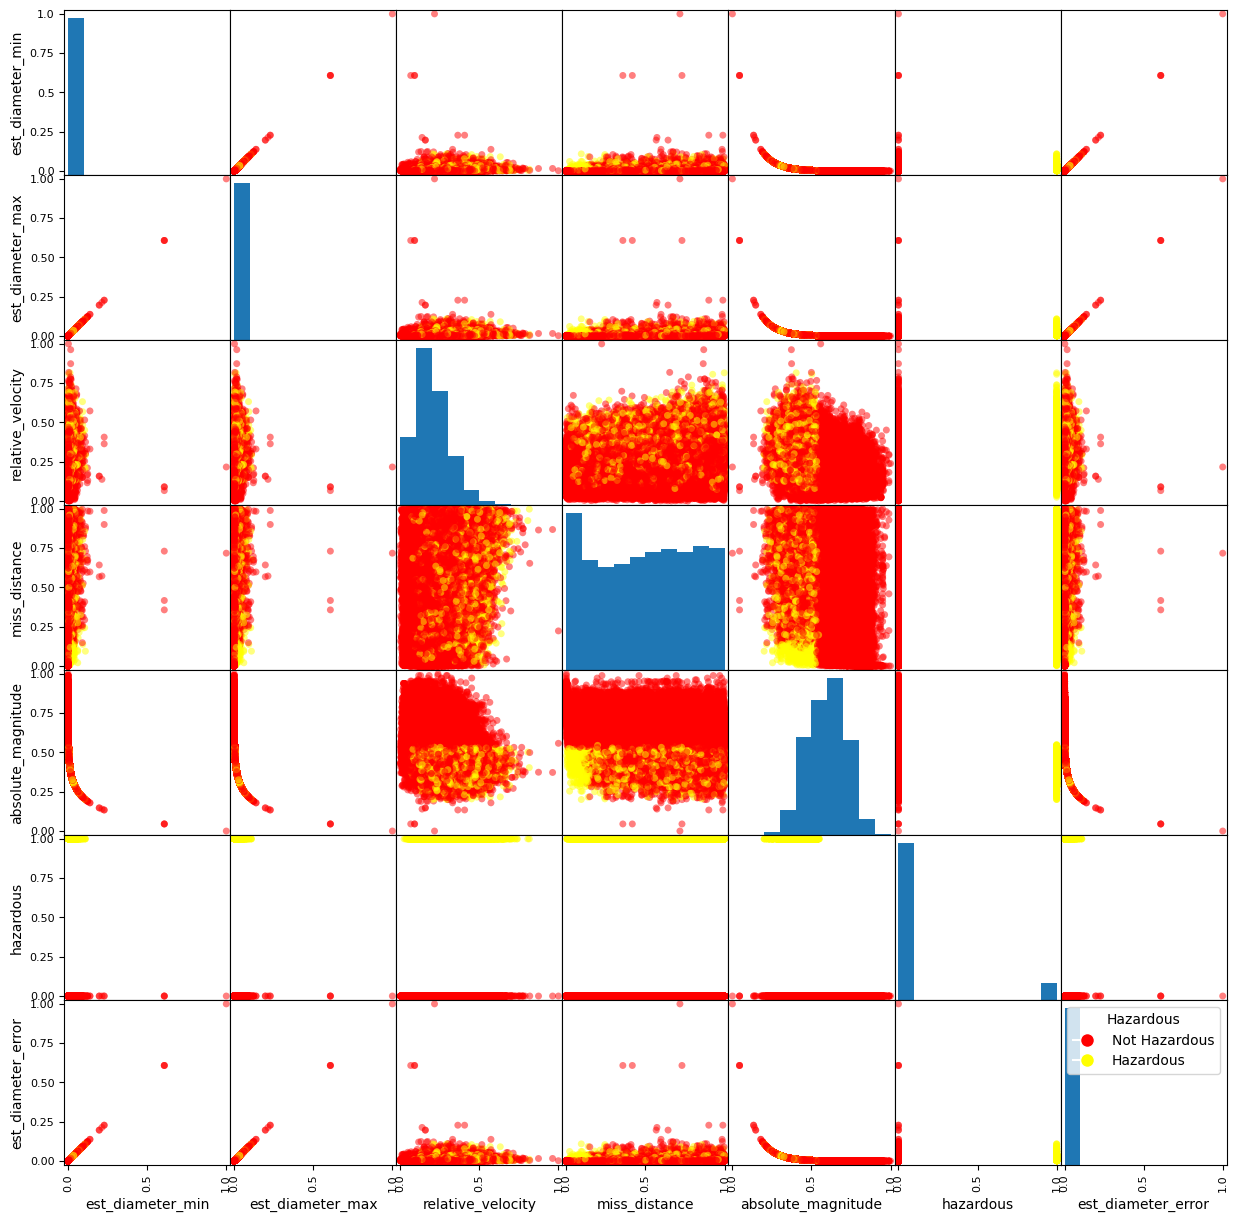

In [ ]:
#multivariant analysis between each variable with all other. coloring based on hazardous attribute
colors = df['hazardous'].map({0: 'red', 1: 'yellow'})
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(15, 15), marker='.', s=100,color=colors)
legend_labels = ['Not Hazardous', 'Hazardous']
legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for color, label in zip(['red', 'yellow'], legend_labels)]
plt.legend(handles=legend, title='Hazardous', loc='upper right')
plt.show()


In [ ]:
import numpy as np

Donut Plot b/w Hazardous and Miss Distance

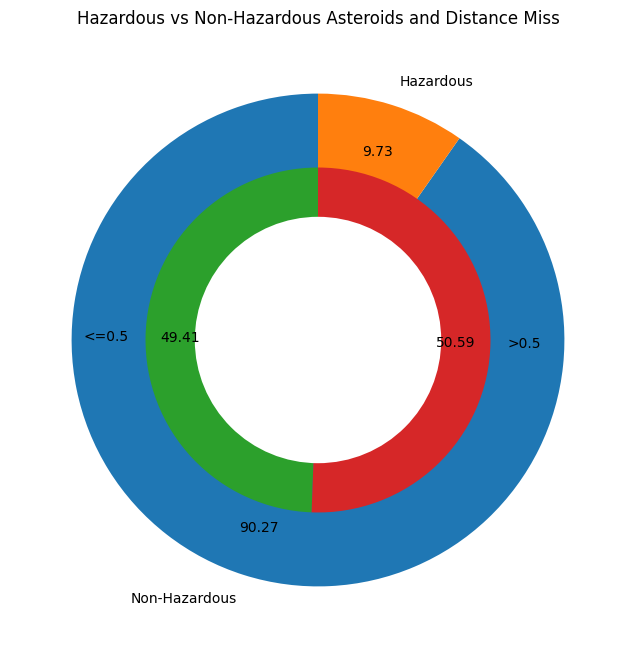

In [ ]:
#donut plot b/w hazardous and miss_distance attributes
plt.figure(figsize=(8,8))
#outside donut tells hazardous or not
outs=plt.pie(df.hazardous.value_counts().values,
              labels=["Non-Hazardous","Hazardous"],
              autopct="%0.2f",
              pctdistance=0.80,
              startangle=90)

less_than_half = df[df['miss_distance'] <= 0.5].shape[0]
greater_than_half = df[df['miss_distance'] > 0.5].shape[0]

#inside donut tells us miss_distance
ins=plt.pie([less_than_half, greater_than_half],
              labels=["<=0.5",">0.5"],
              autopct="%0.2f",
              radius=0.7,
              pctdistance=0.80,
              startangle=90)

hole=plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)
plt.title('Hazardous vs Non-Hazardous Asteroids and Distance Miss')
plt.show()

Donut Plot b/w Hazardous and Relative Velocity

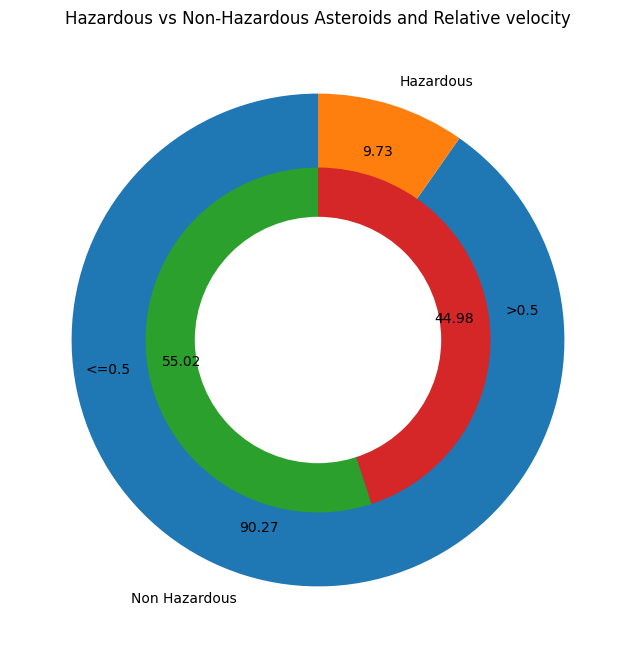

In [ ]:

plt.figure(figsize=(8,8))
#outside donut tells hazardous or not
outs=plt.pie(df.hazardous.value_counts().values,
              labels=["Non Hazardous","Hazardous"],
              autopct="%0.2f",
              pctdistance=0.80,
              startangle=90)

less_than_half = df[df['relative_velocity'] <= 0.2].shape[0]
greater_than_half = df[df['relative_velocity'] > 0.2].shape[0]

#inside donut tells us relative_velocity
ins=plt.pie([less_than_half, greater_than_half],
              labels=["<=0.5",">0.5"],
              autopct="%0.2f",
              radius=0.7,
              pctdistance=0.80,
              startangle=90)

hole=plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)
plt.title('Hazardous vs Non-Hazardous Asteroids and Relative velocity')
plt.show()

Correlation

In [ ]:
df2=df.copy()
df2=df2.drop(['name'],axis=1)
df2.head()
corr_matrix=df2.corr()
corr_matrix

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,est_diameter_error
est_diameter_min,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363,1.000000
est_diameter_max,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363,1.000000
relative_velocity,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185,0.221553
miss_distance,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302,0.142241
absolute_magnitude,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267,-0.560188
hazardous,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000,0.183363
est_diameter_error,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363,1.000000


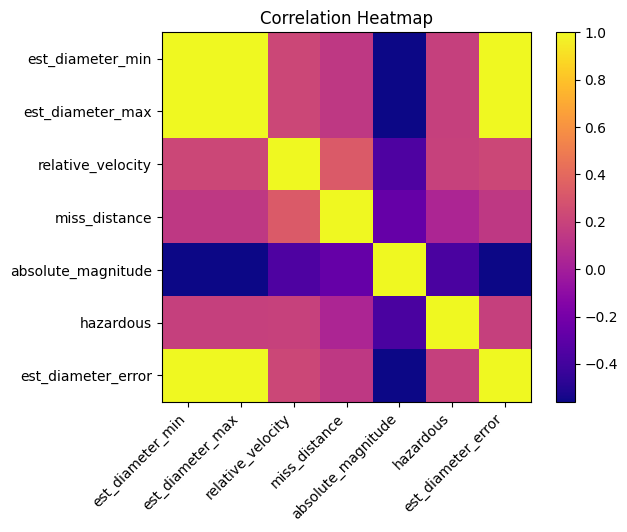

In [ ]:
heatmap=plt.imshow(corr_matrix, cmap='plasma', interpolation='none', aspect='equal')
plt.title("Correlation Heatmap")
plt.title("Correlation Heatmap")
plt.title("Correlation Heatmap")
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)

# Set x-ticks and labels (column names) on the x-axis
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.colorbar(heatmap)
plt.show()


# Deliverable 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import sklearn
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
df=pd.read_csv("cleaned_neo_v2.csv")

In [ ]:
df.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,est_diameter_error
0,162635 (2000 SS164),0.031607,0.031607,0.056447,0.733141,0.312891,0,0.031607
1,277475 (2005 WK4),0.006999,0.006999,0.309922,0.821364,0.449312,1,0.006999
2,512244 (2015 YE18),0.019039,0.019039,0.481680,0.665740,0.358782,0,0.019039
3,(2012 BV13),0.002531,0.002531,0.103726,0.339986,0.541093,0,0.002531
4,(2014 GE35),0.006714,0.006714,0.179632,0.618634,0.453066,1,0.006714


In [ ]:
X = df.drop(columns=['name','est_diameter_min','est_diameter_error','hazardous'], axis=1)
y = df['hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(81, input_dim=4, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=256, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
loss2, accuracy2 =model.evaluate(X_train,y_train)
print(f'Training dataset loss: {loss2}, validation: {accuracy2}')
print(f'Validation dataset Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/5
284/284 [==============================] - 3s 4ms/step - loss: 0.2265 - accuracy: 0.9028 - val_loss: 0.1991 - val_accuracy: 0.9132
Epoch 2/5
284/284 [==============================] - 1s 4ms/step - loss: 0.2000 - accuracy: 0.9090 - val_loss: 0.1977 - val_accuracy: 0.9106
Epoch 3/5
284/284 [==============================] - 1s 3ms/step - loss: 0.1958 - accuracy: 0.9101 - val_loss: 0.2029 - val_accuracy: 0.9117
Epoch 4/5
284/284 [==============================] - 1s 3ms/step - loss: 0.1961 - accuracy: 0.9099 - val_loss: 0.1937 - val_accuracy: 0.9125
Epoch 5/5
2271/2271 [==============================] - 4s 2ms/step - loss: 0.1884 - accuracy: 0.9117
Training dataset loss: 0.18837617337703705, validation: 0.9116529822349548
Validation dataset Loss: 0.18712739646434784, Test Accuracy: 0.9134191870689392


In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [ ]:
# Assuming your model is already trained and compiled
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Loss: {loss}')


568/568 [==============================] - 1s 2ms/step - loss: 0.1871 - accuracy: 0.9134
Accuracy: 0.9134191870689392
Loss: 0.18712739646434784


In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [ ]:
# Load the model from the .pkl file
loaded_model = joblib.load('model.pkl')

In [ ]:
print(y_pred_binary)

[[1]]


568/568 [==============================] - 1s 1ms/step


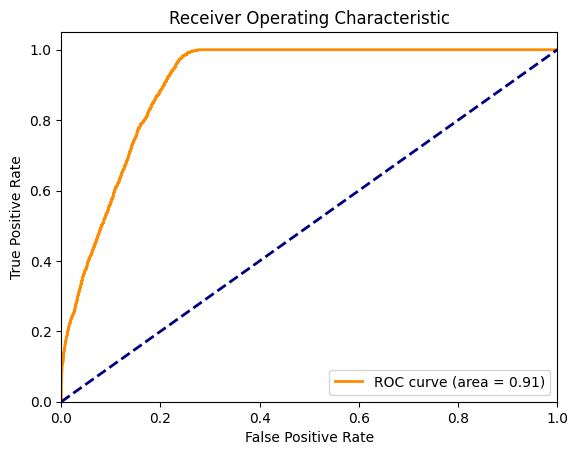

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from plotnine import *
import plotnine


predicted_probabilities = model.predict(X_test)
positive_probabilities = predicted_probabilities[:, 0]

fpr, tpr, thresholds = roc_curve(y_test, positive_probabilities)
roc_auc = auc(fpr, tpr)
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Best Threshold: 0.14830000698566437 with G-Mean: 0.8612
FPR: 0.2458, TPR: 0.9832


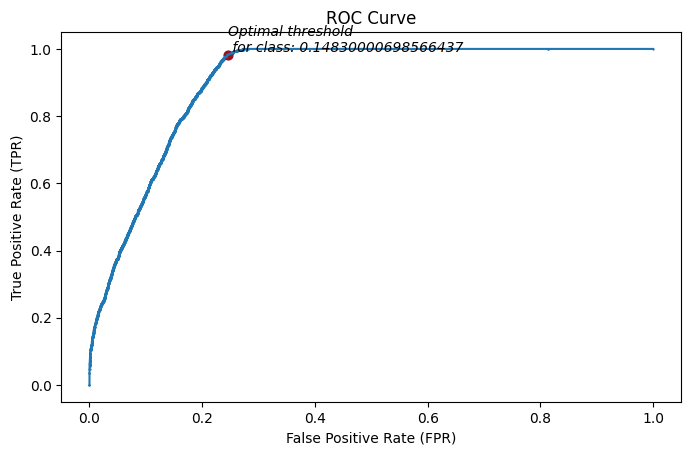

In [ ]:
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
g_mean = np.sqrt(tpr * (1 - fpr))

index = np.argmax(g_mean)

thresholdOpt = round(thresholds[index], ndigits = 4)

gmeanOpt = round(g_mean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)

tprOpt = round(tpr[index], ndigits = 4)

print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))


import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4.8))
plt.scatter(df_fpr_tpr['FPR'], df_fpr_tpr['TPR'], s=0.4)
plt.scatter(fprOpt, tprOpt, color='#981220', s=40)
plt.plot(df_fpr_tpr['FPR'], df_fpr_tpr['TPR'])
plt.text(fprOpt, tprOpt, 'Optimal threshold \n for class: {}'.format(thresholdOpt),ha='left', va='bottom', fontsize=10, style='italic')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

568/568 [==============================] - 1s 2ms/step
Accuracy Score: 0.7705856450902686
f1_score: 0.4499868039060438
Precision: 0.2915028209950419
Recall: 0.9861191440138809
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86     16439
           1       0.29      0.99      0.45      1729

    accuracy                           0.77     18168
   macro avg       0.64      0.87      0.65     18168
weighted avg       0.93      0.77      0.82     18168



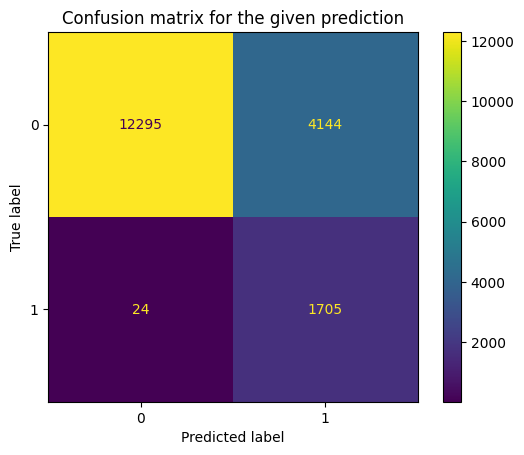

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import recall_score,precision_score
y_pred = model.predict(X_test)
y_true_classes = y_test
#thresholding for binary classification
y_pred_binary = (y_pred > 0.13).astype(int)

def evaluation(y_test,y_pred):

    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()

evaluation(y_true_classes,y_pred_binary)

# Alternative Approaches Tried

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(256, input_dim=4, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=256, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
loss2, accuracy2 =model.evaluate(X_train,y_train)
print(f'Training dataset loss: {loss2}, validation: {accuracy2}')
print(f'Validation dataset Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/5
284/284 [==============================] - 5s 10ms/step - loss: 0.2242 - accuracy: 0.9014 - val_loss: 0.1938 - val_accuracy: 0.9111
Epoch 2/5
284/284 [==============================] - 3s 10ms/step - loss: 0.1990 - accuracy: 0.9088 - val_loss: 0.2043 - val_accuracy: 0.9052
Epoch 3/5
284/284 [==============================] - 3s 11ms/step - loss: 0.1985 - accuracy: 0.9091 - val_loss: 0.1944 - val_accuracy: 0.9053
Epoch 4/5
284/284 [==============================] - 4s 14ms/step - loss: 0.1958 - accuracy: 0.9091 - val_loss: 0.1948 - val_accuracy: 0.9057
Epoch 5/5
2271/2271 [==============================] - 6s 3ms/step - loss: 0.1913 - accuracy: 0.9104
Training dataset loss: 0.19132466614246368, validation: 0.9104282259941101
Validation dataset Loss: 0.19118881225585938, Test Accuracy: 0.9121532440185547


568/568 [==============================] - 1s 2ms/step


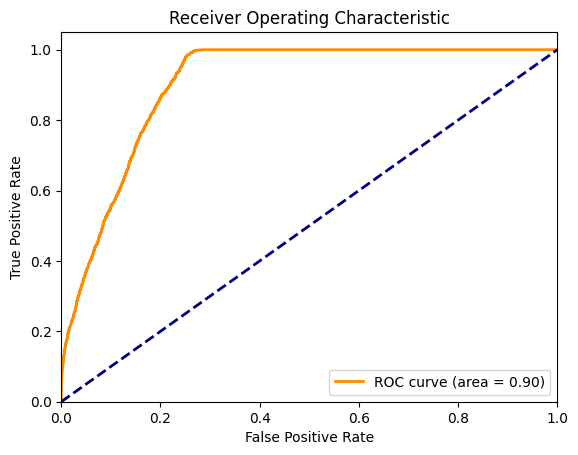

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from plotnine import *
import plotnine


predicted_probabilities = model.predict(X_test)
positive_probabilities = predicted_probabilities[:, 0]

fpr, tpr, thresholds = roc_curve(y_test, positive_probabilities)
roc_auc = auc(fpr, tpr)
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Best Threshold: 0.05979999899864197 with G-Mean: 0.857
FPR: 0.2521, TPR: 0.9821


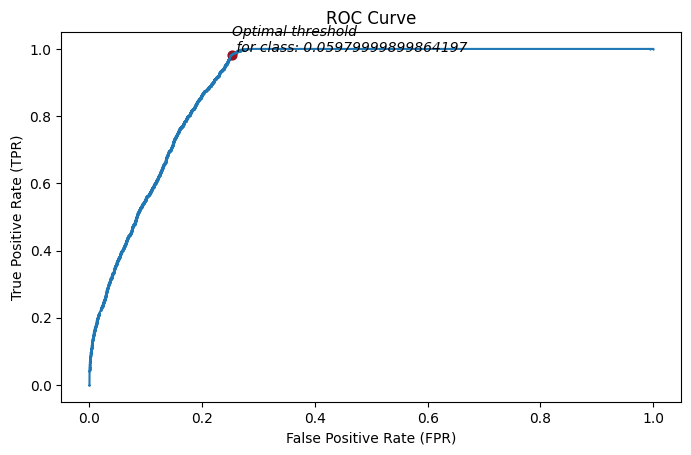

In [ ]:
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
g_mean = np.sqrt(tpr * (1 - fpr))

index = np.argmax(g_mean)

thresholdOpt = round(thresholds[index], ndigits = 4)

gmeanOpt = round(g_mean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)

tprOpt = round(tpr[index], ndigits = 4)

print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))


import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4.8))
plt.scatter(df_fpr_tpr['FPR'], df_fpr_tpr['TPR'], s=0.4)
plt.scatter(fprOpt, tprOpt, color='#981220', s=40)
plt.plot(df_fpr_tpr['FPR'], df_fpr_tpr['TPR'])
plt.text(fprOpt, tprOpt, 'Optimal threshold \n for class: {}'.format(thresholdOpt),ha='left', va='bottom', fontsize=10, style='italic')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

568/568 [==============================] - 1s 2ms/step
Accuracy Score: 0.7773007485689124
f1_score: 0.4481723949809056
Precision: 0.293235766553632
Recall: 0.9502602660497398
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86     16439
           1       0.29      0.95      0.45      1729

    accuracy                           0.78     18168
   macro avg       0.64      0.85      0.65     18168
weighted avg       0.93      0.78      0.82     18168



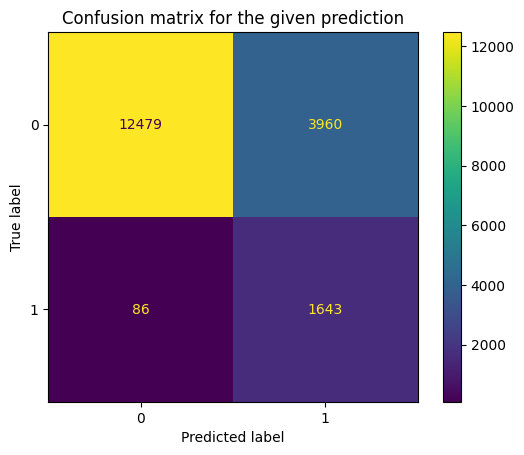

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import recall_score,precision_score
y_pred = model.predict(X_test)
y_true_classes = y_test
#thresholding for binary classification
y_pred_binary = (y_pred > 0.14).astype(int)

evaluation(y_true_classes,y_pred_binary)

# Trying with SMOTE

In [ ]:
y.value_counts()

0    81996
1     8840
Name: hazardous, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X = df.drop(columns=['name','est_diameter_min','est_diameter_error','hazardous'], axis=1)
y = df['hazardous']
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Random Forest Classifier

Accuracy Score: 0.94176867635282
f1_score: 0.9427510966145541
Precision: 0.9176702430479527
Recall: 0.9692414431082331
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     13251
           1       0.92      0.97      0.94     12972

    accuracy                           0.94     26223
   macro avg       0.94      0.94      0.94     26223
weighted avg       0.94      0.94      0.94     26223



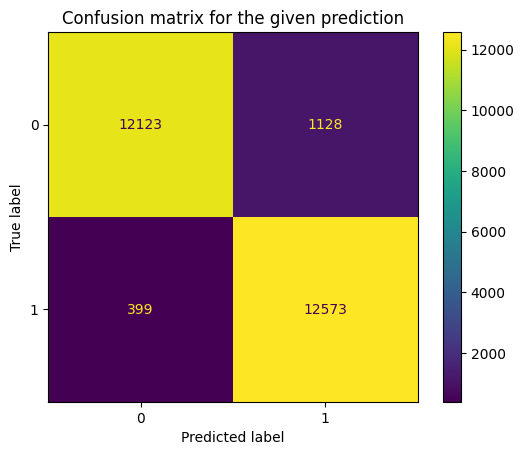

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
rf=RandomForestClassifier()
y_pred=rf.fit(X_train,y_train).predict(X_test)
evaluation(y_test,y_pred)

In [ ]:
joblib.dump(rf,"rf.h5")

['rf.h5']

Linear Regression

Accuracy Score: 0.8465469244556305
f1_score: 0.8560286225402505
Precision: 0.7987047669915877
Recall: 0.9222170829478877
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.84     13251
           1       0.80      0.92      0.86     12972

    accuracy                           0.85     26223
   macro avg       0.85      0.85      0.85     26223
weighted avg       0.86      0.85      0.85     26223



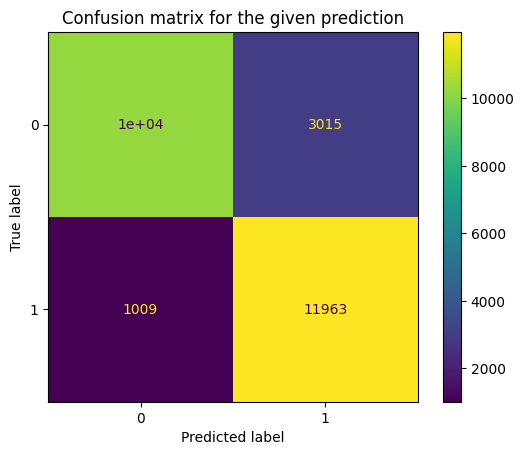

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() # Machine instance
lr_model=lr.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
evaluation(y_test,y_pred)

Custom Neural network

In [ ]:
# model = keras.Sequential([
#     keras.layers.Dense(512, input_dim=4, activation='relu'),
#      keras.layers.Dense(512, activation='relu'),
#     keras.layers.Dense(512, activation='relu'),
#     keras.layers.Dense(512, activation='relu'),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])
model = keras.Sequential([
    keras.layers.Dense(512, input_dim=4, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
     keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
loss2, accuracy2 =model.evaluate(X_train,y_train)
print(f'Training dataset loss: {loss2}, validation: {accuracy2}')
print(f'Validation dataset Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/5
205/205 [==============================] - 52s 194ms/step - loss: 0.3624 - accuracy: 0.8429 - val_loss: 3.4445 - val_accuracy: 0.6936
Epoch 2/5
205/205 [==============================] - 44s 214ms/step - loss: 0.3247 - accuracy: 0.8633 - val_loss: 0.8903 - val_accuracy: 0.8243
Epoch 3/5
205/205 [==============================] - 43s 209ms/step - loss: 0.3200 - accuracy: 0.8657 - val_loss: 0.3432 - val_accuracy: 0.8636
Epoch 4/5
205/205 [==============================] - 39s 189ms/step - loss: 0.3132 - accuracy: 0.8693 - val_loss: 0.5525 - val_accuracy: 0.8123
Epoch 5/5
3278/3278 [==============================] - 31s 10ms/step - loss: 0.5212 - accuracy: 0.8172
Training dataset loss: 0.5211853384971619, validation: 0.8172388672828674
Validation dataset Loss: 0.5234202742576599, Test Accuracy: 0.8116157650947571


Best Threshold: 0.11079999804496765 with G-Mean: 0.8525
FPR: 0.2664, TPR: 0.9907


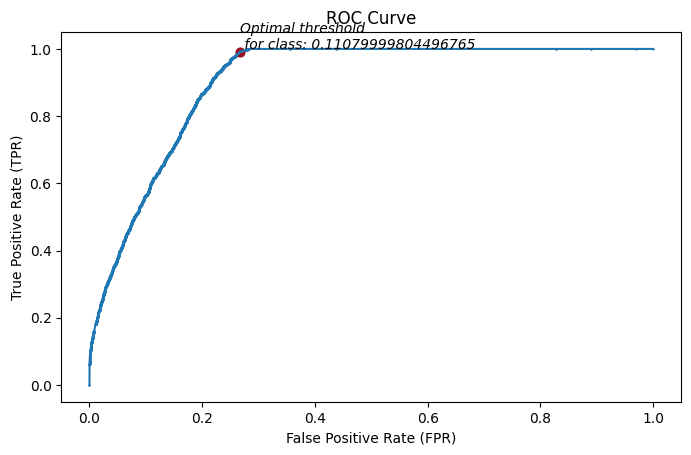

In [ ]:
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
g_mean = np.sqrt(tpr * (1 - fpr))

index = np.argmax(g_mean)

thresholdOpt = round(thresholds[index], ndigits = 4)

gmeanOpt = round(g_mean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)

tprOpt = round(tpr[index], ndigits = 4)

print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))


import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4.8))
plt.scatter(df_fpr_tpr['FPR'], df_fpr_tpr['TPR'], s=0.4)
plt.scatter(fprOpt, tprOpt, color='#981220', s=40)
plt.plot(df_fpr_tpr['FPR'], df_fpr_tpr['TPR'])
plt.text(fprOpt, tprOpt, 'Optimal threshold \n for class: {}'.format(thresholdOpt),ha='left', va='bottom', fontsize=10, style='italic')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

820/820 [==============================] - 9s 11ms/step
Accuracy Score: 0.8459749075239293
f1_score: 0.8542140407868616
Precision: 0.8031629674879522
Recall: 0.912195497995683
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84     13251
           1       0.80      0.91      0.85     12972

    accuracy                           0.85     26223
   macro avg       0.85      0.85      0.85     26223
weighted avg       0.85      0.85      0.85     26223



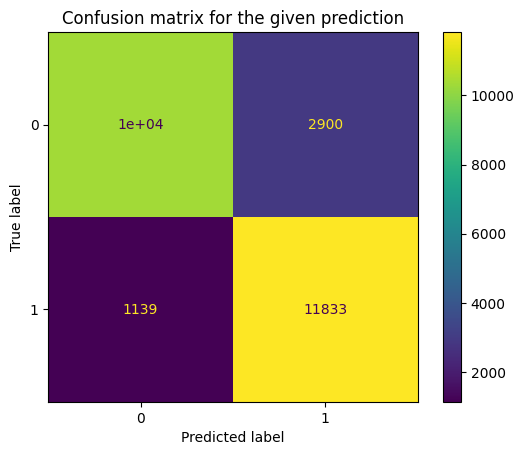

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import recall_score,precision_score
y_pred = model.predict(X_test)
y_true_classes = y_test
#thresholding for binary classification
y_pred_binary = (y_pred > 0.14).astype(int)

evaluation(y_true_classes,y_pred_binary)